In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Function to load data, process it, and convert to DataFrame for a specific lat/lon
def load_and_process_data_to_df(fileinput, lat, lon, month=7):
    # Open the dataset
    ds = xr.open_dataset(fileinput)
    
    # Calculate the nearest grid point indices
    abs_diff_lat = np.abs(ds.latitude[:, 0].values - lat)
    abs_diff_lon = np.abs(ds.longitude[0, :].values - lon)
    lat_idx = abs_diff_lat.argmin().item()
    lon_idx = abs_diff_lon.argmin().item()

    # Select data only for the specified month
    monthly_data = ds.sel(valid_time=ds.valid_time.dt.month == month)

    # Extract values at the nearest grid point
    data_at_point = monthly_data.isel(x=lon_idx, y=lat_idx)

    # Convert the data at the nearest grid point to a DataFrame
    df = data_at_point.to_dataframe().reset_index()

    return df

# Function to load and merge multiple files into a single DataFrame
def load_and_merge_files(file_list, lat, lon, month=7):
    data_frames = []
    
    for file in file_list:
        df = load_and_process_data_to_df(file, lat, lon, month)
        data_frames.append(df)
    
    # Concatenate all the data frames into one
    merged_df = pd.concat(data_frames, ignore_index=True)
    
    return merged_df

# Example usage
file_list = [
    '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2000.nc', 
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2001.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2002.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2003.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2004.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2005.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2006.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2007.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2008.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2009.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2010.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2011.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2012.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2013.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2014.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2015.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2016.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2017.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2018.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2019.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2020.nc',
  '/data/IMFSE/PythonCourse/CDS/CERRA/cerra-2021.nc'
    # Add all 22 file paths here
]

lat = 41.709377863541654
lon = 1.892273844304144

# Load and merge data from all files for July
merged_data = load_and_merge_files(file_list, lat, lon)

# Display the merged DataFrame
print(merged_data)

# If you want to save the merged dataframe to a CSV file
merged_data.to_csv('merged_data.csv', index=False)

              valid_time  latitude  longitude expver      wdir10      si10  \
0    2000-07-01 00:00:00  47.89917  -1.090566   prod  250.703400  2.623460   
1    2000-07-01 06:00:00  47.89917  -1.090566   prod  203.195374  2.871353   
2    2000-07-01 12:00:00  47.89917  -1.090566   prod  216.039597  4.154931   
3    2000-07-01 18:00:00  47.89917  -1.090566   prod  238.953476  4.594299   
4    2000-07-02 00:00:00  47.89917  -1.090566   prod  248.671875  1.979007   
...                  ...       ...        ...    ...         ...       ...   
2723 2021-07-30 18:00:00  47.89917  -1.090566   prod  250.453506  7.346303   
2724 2021-07-31 00:00:00  47.89917  -1.090566   prod  289.179718  2.169646   
2725 2021-07-31 06:00:00  47.89917  -1.090566   prod  262.742676  3.036371   
2726 2021-07-31 12:00:00  47.89917  -1.090566   prod  256.085968  3.266730   
2727 2021-07-31 18:00:00  47.89917  -1.090566   prod  324.266266  3.126098   

             r2         t2m  
0     88.884361  289.204681  
1  

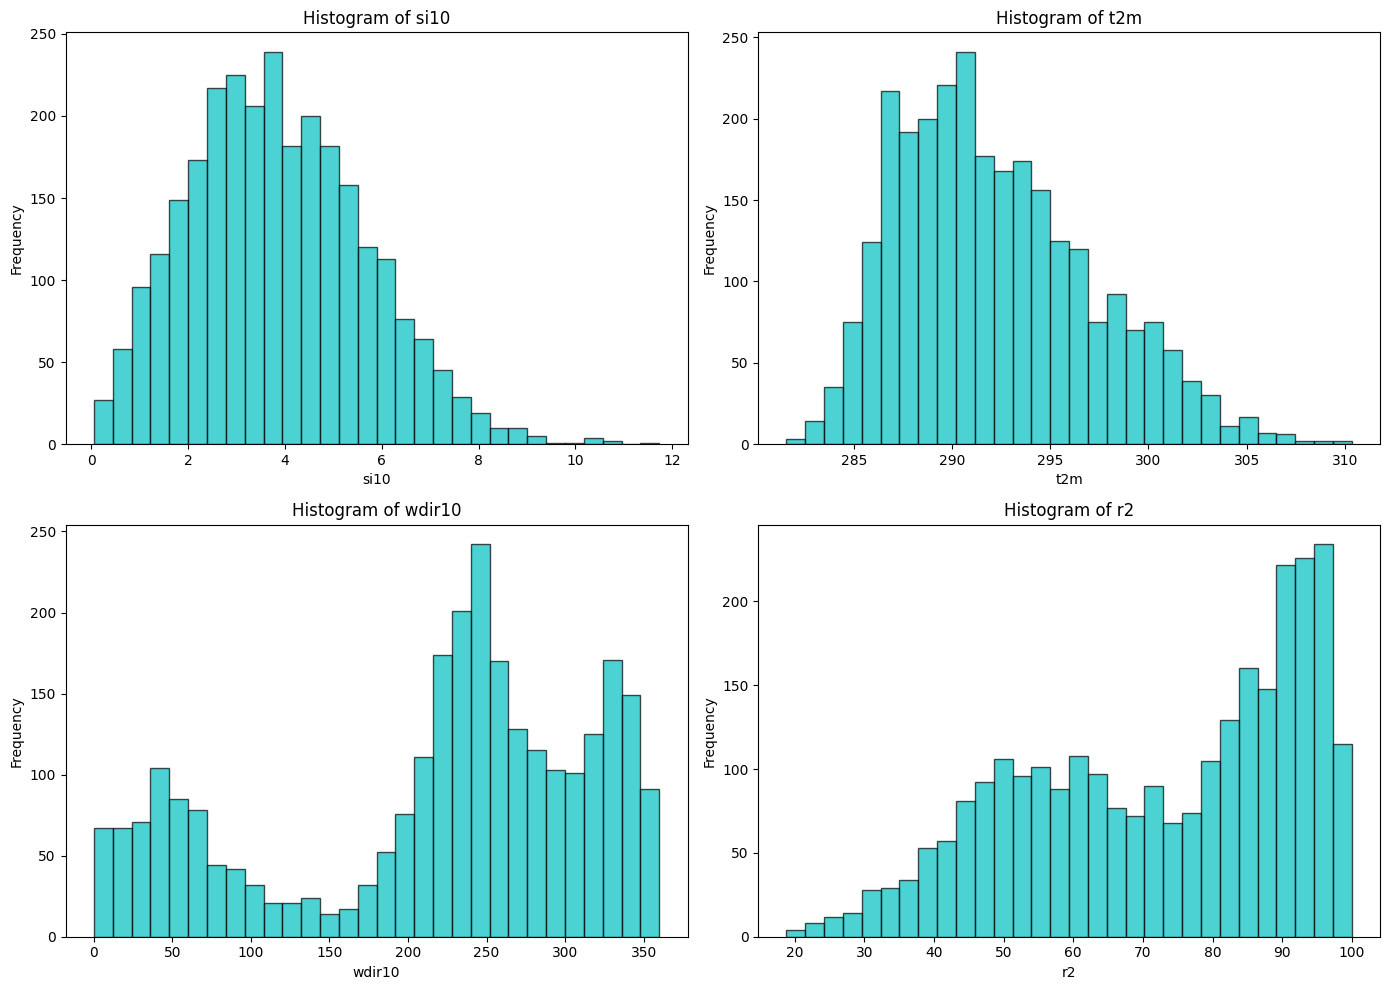

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot histograms for the selected parameters
def plot_histograms(df, parameters):
    plt.figure(figsize=(14, 10))
    
    # Loop over the parameters and create subplots
    for i, param in enumerate(parameters, 1):
        plt.subplot(2, 2, i)  # 2 rows, 2 columns for 4 plots
        plt.hist(df[param].dropna(), bins=30, color='c', edgecolor='k', alpha=0.7)
        plt.title(f'Histogram of {param}')
        plt.xlabel(param)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

# Example usage: assuming your merged_data DataFrame has the following columns
parameters_to_plot = ['si10', 't2m', 'wdir10', 'r2']

# Plot the histograms
plot_histograms(merged_data, parameters_to_plot)

In [3]:
# Function to calculate statistics for selected parameters
def calculate_statistics(df, parameters):
    stats = {}
    
    for param in parameters:
        min_val = df[param].min()
        max_val = df[param].max()
        std_val = df[param].std()
        
        stats[param] = {
            'min': min_val,
            'max': max_val,
            'std': std_val
        }
    
    return pd.DataFrame(stats)

# Example usage: assuming your merged_data DataFrame has the following columns
parameters_to_analyze = ['si10', 't2m', 'wdir10', 'r2']

# Calculate statistics for the parameters
statistics = calculate_statistics(merged_data, parameters_to_analyze)

# Display the statistics
print(statistics)

          si10         t2m      wdir10          r2
min   0.059785  281.572632    0.093877   18.783203
max  11.728673  310.344482  359.945496  100.000961
std   1.819511    4.918058  101.984047   19.930359
